# Analyze 2012-2016 Revenue Performance

In this challenge, I created a Python script for analyzing the financial records of PyBank.

This notebook will bring all the data sources together and format them for further analysis.


## Data Sources:
* revenue_2009_2016.csv : Processed data from the data-prep


Each dataset is composed of two columns: Date and Revenue.



### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [4]:
# Directory Location and Filenames

dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
# Load Data into csv

df = pd.read_csv(os.path.join(dir, file), parse_dates=[0], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,943690.0
2009-02-01,1062565.0
2009-03-01,210079.0
2009-04-01,-735286.0
2009-05-01,842933.0


In [6]:
df.describe()

,Revenue
count,8.600000e+01
mean,6.505270e+05
std,6.804601e+05
min,-1.063151e+06
25%,2.795512e+05
50%,6.869005e+05
75%,1.118162e+06
max,2.211086e+06


In [7]:
df.dtypes

Revenue    float64
dtype: object

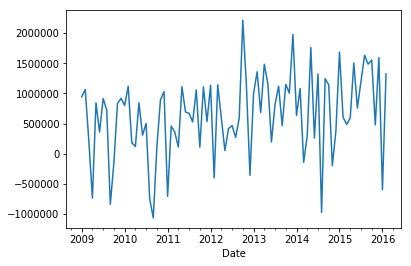

In [8]:
# Plot the Revenue

df['Revenue'].plot(kind='line')

Text(0,0.5,'Occurrence')

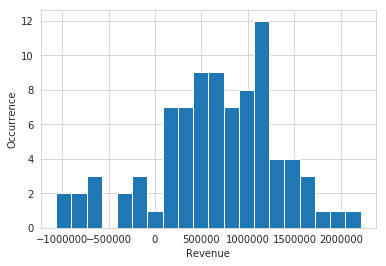

In [9]:
# Plot the histogram of the Revenue

sns.set_style('whitegrid')
fig, ax = plt.subplots()
df['Revenue'].hist(ax=ax, bins=20)
ax.tick_params(labelsize=10)
ax.set_xlabel('Revenue', fontsize=10)
ax.set_ylabel('Occurrence', fontsize=10)

In [10]:
# Summarizing Stocks by Quarter
# Highligh - Max Revenue
# Red - Revenue Loss

dfq = df.resample('Q').mean()

dfq.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-03-31 00:00:00,738778
2009-06-30 00:00:00,155446
2009-09-30 00:00:00,266971
2009-12-31 00:00:00,534184
2010-03-31 00:00:00,699454
2010-06-30 00:00:00,424149
2010-09-30 00:00:00,-436496
2010-12-31 00:00:00,676494
2011-03-31 00:00:00,36877.3


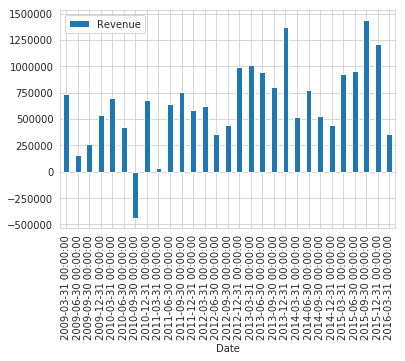

In [11]:
dfq.plot(kind='bar')

In [12]:
# Summarizing Stocks by Year
# Highligh - Max Revenue
# Red - Revenue Loss

dfy = df.resample('A-DEC').mean()

dfy.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-12-31 00:00:00,423845
2010-12-31 00:00:00,340900
2011-12-31 00:00:00,502165
2012-12-31 00:00:00,604469
2013-12-31 00:00:00,1.03313e+06
2014-12-31 00:00:00,567201
2015-12-31 00:00:00,1.13007e+06
2016-12-31 00:00:00,361980


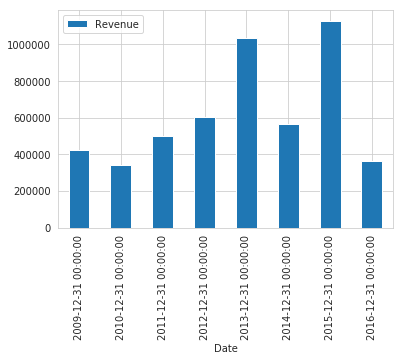

In [13]:
# Revenue Per year

dfy.plot(kind='Bar')